## Introduction

L'objectif ici est de créer un classifieur d'article en fonction de son sujet principal

Le sujet principal choisi ici est le 'Football' car c'est un sujet pour lequel il est facile de trouver du contenu, et les autres articles proviennent d'un dataset de d'articles à propos du covid.  
Le tout en Français

Voici à quoi ressemble notre dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_full = pd.read_csv('datasets/full_df.csv')

In [4]:
df_full.head()

,title,description,article_text,labels
0,Ce club qui se moque ouvertement de Cristiano ...,Le président de Flamengo se moque ouvertement ...,Le président de Flamengo a rejeté les spécula...,football
1,"Zidane, son avenir est acté : incroyable retou...","Libre depuis son départ du Real Madrid, Zinédi...",Alors qu'il n'a toujours pas retrouvé de banc...,football
2,Un nouvel adversaire pour l’Algérie en novembre,"En plus de la Suède, l’Algérie de Belmadi va s...",L’équipe nationale algérienne sera de sortie ...,football
3,"Troyes – Auxerre : diffusion TV, live streamin...","Où voir le match ? Heure du coup d'envoi, les ...","Un petit point sépare Troyes, douzième, d'Aux...",football
4,Stupeur : Gerard Piqué annonce sa retraite IMM...,Le défenseur du Barça a choqué le monde du foo...,"Le défenseur central du FC Barcelone, Gerard ...",football


In [6]:
df_full.tail()

,title,description,article_text,labels
588,"Covid en Aveyron : ""Tout le monde déprime, ça ...","En Aveyron, moins affecté que le reste du pays...","Un rayon de soleil, un café à emporter et une ...",autre
589,Covid : les généralistes croulent sous les dem...,Malgré les incertitudes sur l’approvisionnemen...,"Mardi, le téléphone du docteur Christian Delro...",autre
590,"En République tchèque, le Covid fait des ravages",Après une deuxième vague particulièrement meur...,«Best in Covid.» («Les meilleurs face au Covid...,autre
591,"Au Panama, le Covid-19 et la vie sans école ac...","Dans ce petit pays d’Amérique centrale, 890 00...","Brithany a 8 ans. Et, les yeux rivés sur un té...",autre
592,AstraZeneca : pas de lien encore avéré entre l...,Seuls 30 cas d’événements thromboemboliques on...,"Le Danemark, la Norvège et l’Islande ont inter...",autre


Chaque article comporte 4 colonnes : 
- **title** : le titre de l'article 
- **description** : un rapide résumé de l'article
- **article_text** : le corps de l'article
- **labels** : son label permettant d'identifier le sujet abordé

Pour des raisons de simplicité, nous garderons ici uniquement **article_text** et **labels**

In [7]:
df = df_full.drop(columns=['title', 'description'])

Voici des exemples des textes trouvables à l'interieur de notre dataset : 

Football :

In [164]:
df.article_text[2]

" L’équipe nationale algérienne sera de sortie en ce mois de novembre, même si elle n’est pas concernée par la Coupe du Monde au Qatar. En l’espace de trois jours, et comme ce fut le cas en septembre, elle va disputer deux matches amicaux. Les Fennecs se sont mis d’accord avec les Suédois pour un face à face dans le nouveau stade de Malmo le 19 novembre prochain. Mais, avant de prendre la direction de la Scandinavie, ils vont jouer à domicile face à un adversaire africain. Un bon test pour l’Algérie Le 16 novembre (à 20h30 locale), au stade Miloud Hadefi d’Oran, les champions d’Afrique 2019 vont accueillir leur voisin malien. Une belle empoignade en perspective et qui oppose deux équipes ayant échoué en barrages de la dernière Coupe du Monde. L’Algérie a remporté ses deux dernières oppositions contre le Mali. C’était à chaque fois en amical. Le dernier succès malien remonte lui à novembre 2014. C’était à Bamako pour le compte des éliminatoires de la CAN. Deux nouveaux visages chez les 

Autres :

In [12]:
df.article_text[500]

"L'hydroxychloroquine n'est toujours pas autorisée pour traiter le Covid-19. L'agence du médicament (ANSM) a opposé jeudi un refus à une demande que lui avait adressée le professeur Didier Raoult d'un cadre temporaire autorisant une utilisation large du traitement. «Nous ne pouvons pas répondre favorablement à la demande de RTU (recommandation temporaire d'utilisation, ndlr) de l'hydroxychloroquine dans la prise en charge de la maladie Covid-19», indique ainsi l'ANSM dans un point d'information mis en ligne sur son site internet.\n«A ce jour, les données disponibles, très hétérogènes et inégales, ne permettent pas de présager d'un bénéfice de l'hydroxychloroquine, seule ou en association, pour le traitement ou la prévention de la maladie Covid-19», argumente-t-elle. «Dans ce contexte et au regard des données de sécurité disponibles faisant apparaître des risques majorés, notamment cardio-vasculaires, il ne peut être présumé d'un rapport bénéfice/risque favorable de l'hydroxychloroquine

## Exploratory Data Analysis

##### Nombre de mots par article

<AxesSubplot: >

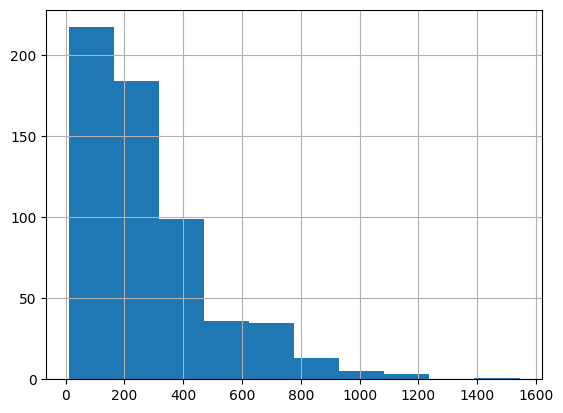

In [37]:
df.article_text.str.split().map(lambda x: len(x)).hist()

##### Taille Moyenne des mots

<AxesSubplot: >

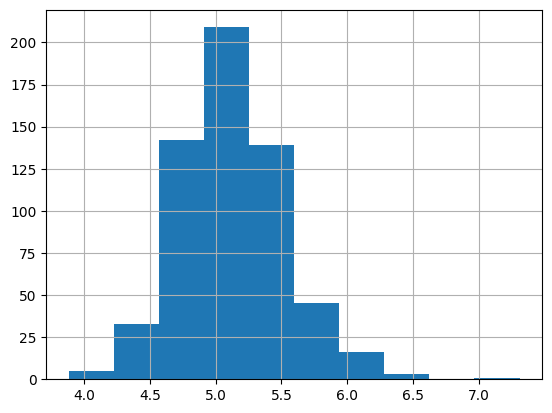

In [38]:
df.article_text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [166]:
fr_stopwords = pd.read_csv('datasets/stopwords/stopword.csv')
list_fr_stopwords = fr_stopwords['0'].tolist()

In [167]:
def create_corpus(df, art_labels):
    print('ok')
    temp_df = df[df.labels == art_labels]
    article_list_temp = temp_df['article_text'].str.split()
    article_list = article_list_temp.values.tolist()
    corpus = [word for i in article_list for word in i]
    return corpus

In [168]:
corpus_foot= create_corpus(df, 'football')
corpus_autre=create_corpus(df, 'autre')

ok
ok


In [169]:
from collections import Counter
def most_used_word_plt(corpus, title):
    counter=Counter(corpus)
    most=counter.most_common()
    x, y= [], []
    for word,count in most[:100]:
        if (word.lower() not in list_fr_stopwords):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x).set(title=f'Mots les plus utilisés parmis le label : {title}')

##### Liste des mots les plus utilisés parmis le label 'Football'

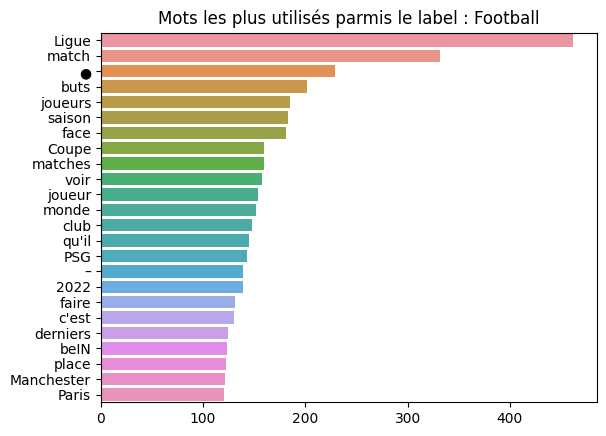

In [170]:
most_used_word_plt(corpus_foot, 'Football')

##### Liste des mots les plus utilisés parmis le label 'Autre'

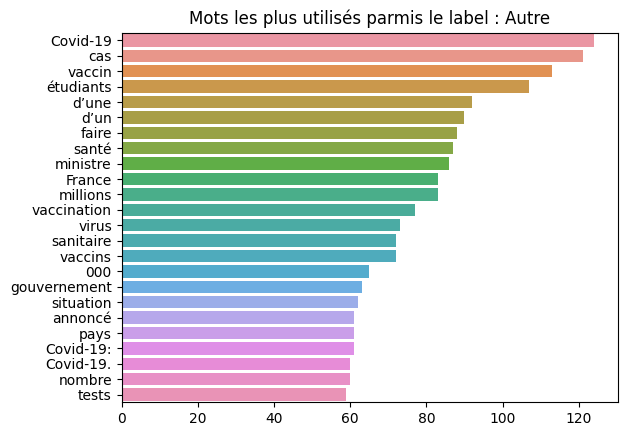

In [171]:
most_used_word_plt(corpus_autre, 'Autre')

#### Creation d'un WordCloud

In [172]:
from wordcloud import WordCloud

In [176]:
def create_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=list_fr_stopwords,
        max_words=50,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(' '.join(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.title(f'WordCloud des articles labélisés : {title} ', fontsize=40)
    plt.imshow(wordcloud)
    plt.show()

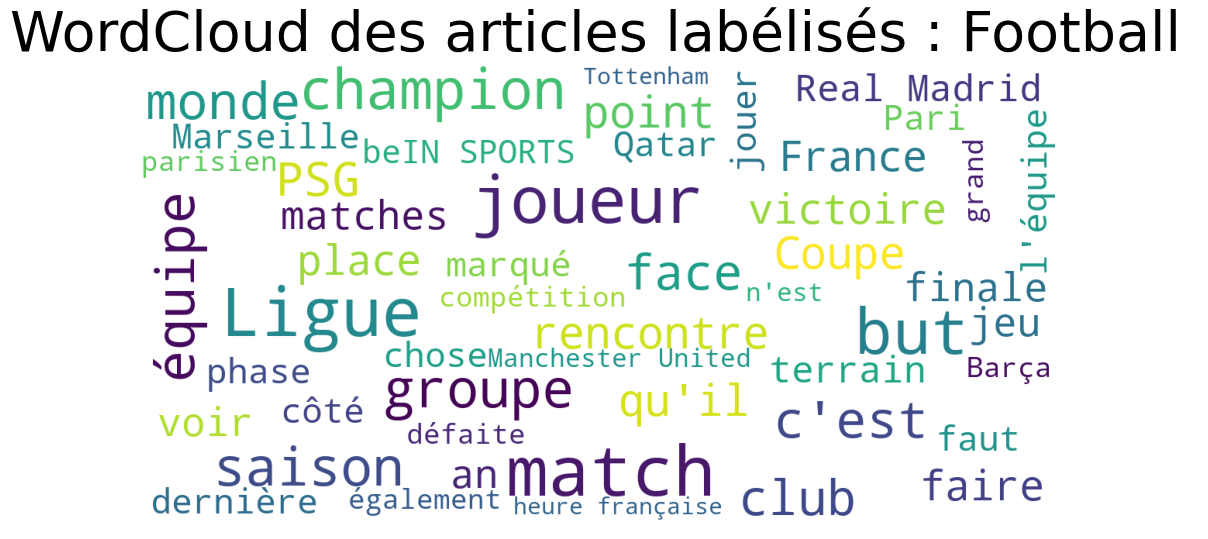

In [177]:
create_wordcloud(corpus_foot, 'Football')

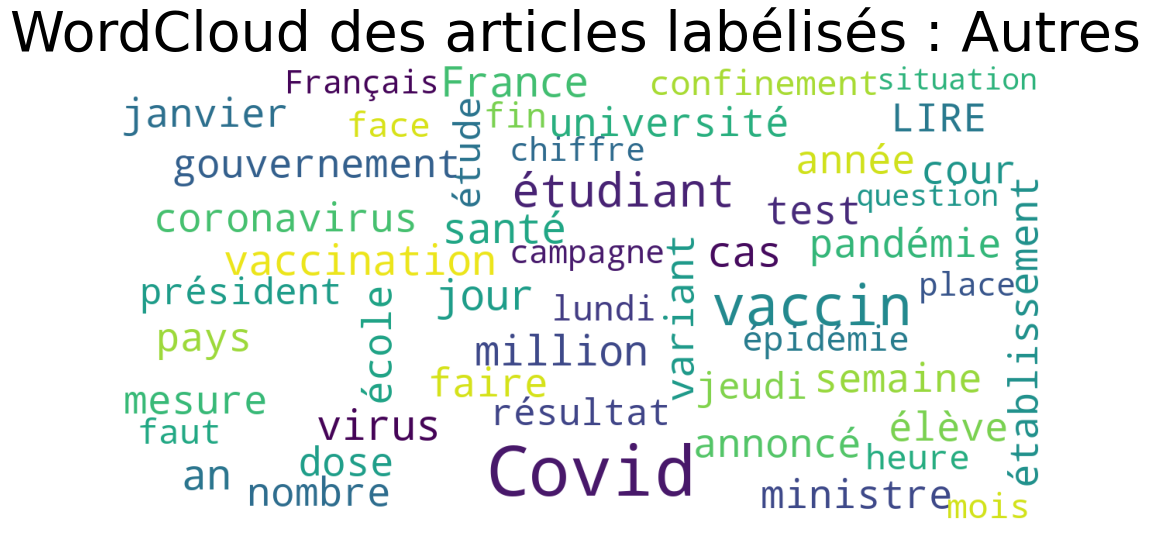

In [178]:
create_wordcloud(corpus_autre, 'Autres')